# CSCI-P556, Fall 2018
# Assignment 4

We will be using the the following data sets in this assignment:



*   [Ionosphere](https://archive.ics.uci.edu/ml/datasets/ionosphere)
*   [Car Evaluation](https://archive.ics.uci.edu/ml/datasets/car+evaluation)
*   [Credit Approval](https://archive.ics.uci.edu/ml/datasets/Credit+Approval)

Download them to the same folder as this .ipynb file. Take a look at the 'Data Set Descriptions' links in the above links.


In [2]:
import pandas as pd
from random import randrange
import numpy as np
import math
import operator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
import matplotlib.pyplot as plt

In [15]:
df_ionosphere = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data',header=None)
labels,uniques = pd.factorize(df_ionosphere.iloc[:,-1])
df_ionosphere.iloc[:,-1] = labels

df_ionosphere = df_ionosphere.sample(frac=1).reset_index(drop=True)

In [17]:
df_car_evaluation = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",header=None)

#print(df_car_evaluation.head())

df_car_evaluation = df_car_evaluation.replace('vhigh',4)
df_car_evaluation = df_car_evaluation.replace('high',3)
df_car_evaluation = df_car_evaluation.replace('med',2)
df_car_evaluation = df_car_evaluation.replace('low',1)
 
df_car_evaluation = df_car_evaluation.replace('unacc',1)
df_car_evaluation = df_car_evaluation.replace('acc',2)
df_car_evaluation = df_car_evaluation.replace('good',3)
df_car_evaluation = df_car_evaluation.replace('vgood',4)

df_car_evaluation = df_car_evaluation.replace('small',1)
df_car_evaluation = df_car_evaluation.replace('med',2)
df_car_evaluation = df_car_evaluation.replace('big',3)

df_car_evaluation = df_car_evaluation.replace('low',1)
df_car_evaluation = df_car_evaluation.replace('med',2)
df_car_evaluation = df_car_evaluation.replace('high',3)
df_car_evaluation = df_car_evaluation.replace('more',5)
df_car_evaluation = df_car_evaluation.replace('5more',5)
df_car_evaluation = df_car_evaluation.replace('2',2)
df_car_evaluation = df_car_evaluation.replace('3',3)
df_car_evaluation = df_car_evaluation.replace('4',4)

df_car_evaluation = df_car_evaluation.sample(frac=1).reset_index(drop=True)
df_car_evaluation.shape


(1728, 7)

In [18]:
df_credit_approval = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",header=None)
df_credit_approval = df_credit_approval.replace('?',np.nan)
df_credit_approval.dropna(inplace=True)
char_cols = df_credit_approval.dtypes.pipe(lambda x: x[x == 'object']).index

for c in char_cols:
    df_credit_approval[c] = pd.factorize(df_credit_approval[c])[0]

df_credit_approval.shape

(653, 16)

## Problem 1: K-Fold Cross Validation [10 points]

Implement k- fold cross validation and select k = 5 to create 5 training and 5 test data sets from each data
set and save these 30 files. You will use these data sets for model comparison and parameter selection.

In [19]:
def k_fold_crossvalidation(dataset,k):    
    testset_length = int((dataset.shape[0]-1)/k)
    temp = 0
    counter = 0
    output = {}
    for i in range(k):
        test_set = dataset.iloc[temp:temp+testset_length]        
        training_set = dataset.drop(dataset.index[temp:temp+testset_length])
        output[i] = [test_set,training_set]
        temp = temp + int(testset_length)
        counter+=1
    return output


Output is dictionary : fold : [test_set,training_set]

In [20]:
output = k_fold_crossvalidation(df_ionosphere,5) 
output_car_evaluation = k_fold_crossvalidation(df_car_evaluation,5)
output_creditcard = k_fold_crossvalidation(df_credit_approval,5)



## Loading Datasets

In [21]:
#--------------------IONOSPHERE KFOLD-----------------#
train1_ionosphere = output[0][1].reset_index(drop=True)
test1_ionoshere = output[0][0].reset_index(drop=True)

train2_ionoshpere = output[1][1].reset_index(drop=True)
test2_ionoshere = output[1][0].reset_index(drop=True)

train3_ionosphere = output[2][1].reset_index(drop=True)
test3_ionoshere = output[2][0].reset_index(drop=True)

train4_ionoshpere = output[3][1].reset_index(drop=True)
test4_ionoshere = output[3][0].reset_index(drop=True)

train5_ionoshpere = output[4][1].reset_index(drop=True)
test5_ionoshere = output[4][0].reset_index(drop=True)
#-----------------------------------------------------#

#-------------------Car_evaluation--------------------#
train1_car = output_car_evaluation[0][1].reset_index(drop=True)
test1_car = output_car_evaluation[0][0].reset_index(drop=True)

train2_car = output_car_evaluation[1][1].reset_index(drop=True)
test2_car = output_car_evaluation[1][0].reset_index(drop=True)

train3_car = output_car_evaluation[2][1].reset_index(drop=True)
test3_car = output_car_evaluation[2][0].reset_index(drop=True)

train4_car = output_car_evaluation[3][1].reset_index(drop=True)
test4_car = output_car_evaluation[3][0].reset_index(drop=True)

train5_car = output_car_evaluation[4][1].reset_index(drop=True)
test5_car = output_car_evaluation[4][0].reset_index(drop=True)

#-------------------Credit Card Approval --------------------#

train1_credit = output_creditcard[0][1].reset_index(drop=True)
test1_credit = output_creditcard[0][0].reset_index(drop=True)

train2_credit = output_creditcard[1][1].reset_index(drop=True)
test2_credit = output_creditcard[1][0].reset_index(drop=True)

train3_credit = output_creditcard[2][1].reset_index(drop=True)
test3_credit = output_creditcard[2][0].reset_index(drop=True)

train4_credit = output_creditcard[3][1].reset_index(drop=True)
test4_credit = output_creditcard[3][0].reset_index(drop=True)

train5_credit = output_creditcard[4][1].reset_index(drop=True)
test5_credit = output_creditcard[4][0].reset_index(drop=True)

## Problem 2: K-Nearest Neighbors (KNN) [30 points]

---



2.1 Implement KNN algorithm with two different distance functions. You can either use an existing distance
functions, i.e., Euclidean or design your own.

In [65]:
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test1_ionoshere.iloc[:,-1])**2)
    accuracy=100-(error/len(test1_ionoshere))*100
    return accuracy


2.2 Use the data sets obtained in problem 1 to determine the optimal k over each data set for KNN algorithm. For 5 different k values, plot the test error for each data set. Total number of figures = 3 (data set number) × 2 (distance function number) = 6. Report the best k and distance function for each data set.

## Ionosphere Dataset

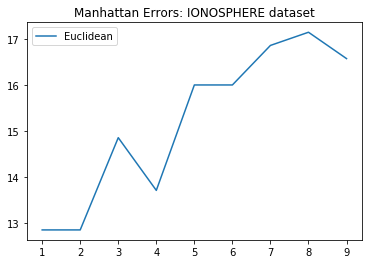

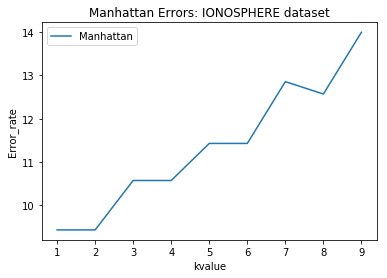

NearestNeighbour  1 ;Error:  9.428571428571416 ;Distance Metric: Manhattan 


In [73]:
X = train1_ionosphere.iloc[:,:-1]
y = train1_ionosphere.iloc[:,-1]
prediction_points= test1_ionoshere.iloc[:,:-1]
prediction_points=np.array(prediction_points)
    
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test1_ionoshere.iloc[:,-1])**2)
    accuracy=100-(error/len(test1_ionoshere))*100
    return accuracy

#for different K values 
acc_euclidean=[]
acc_manhattan=[]
for k in range(1,10):
    
    results_euclidean,results_manhattan = predict(prediction_points,k)
    
    predictions_euclidean=[]
    
    for result in results_euclidean:
        predictions_euclidean.append(result[1])
    acc_euclidean.append([get_accuracy(predictions_euclidean),k])
    
    predictions_manhattan=[]
    for result in results_manhattan:
        predictions_manhattan.append(result[1])
    acc_manhattan.append([get_accuracy(predictions_manhattan),k])
    
plotx=[]
ploty_test1_euclidean = []
for a in acc_euclidean:
    plotx.append(a[1])
    ploty_test1_euclidean.append(a[0])
    
plotx=[]
ploty_test1_manhattan =[]
for a in acc_manhattan:
    plotx.append(a[1])
    ploty_test1_manhattan.append(a[0])


#------------------------------------------------------------------------------------#
#----------------------------------Train2----------------------------------------------#
X = train2_ionoshpere.iloc[:,:-1]
y = train2_ionoshpere.iloc[:,-1]
prediction_points= test2_ionoshere.iloc[:,:-1]
prediction_points=np.array(prediction_points)
    
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test2_ionoshere.iloc[:,-1])**2)
    accuracy=100-(error/len(test1_ionoshere))*100
    return accuracy

#for different K values 
acc_euclidean=[]
acc_manhattan=[]
for k in range(1,10):
    
    results_euclidean,results_manhattan = predict(prediction_points,k)
    
    predictions_euclidean=[]
    
    for result in results_euclidean:
        predictions_euclidean.append(result[1])
    acc_euclidean.append([get_accuracy(predictions_euclidean),k])
    
    predictions_manhattan=[]
    for result in results_manhattan:
        predictions_manhattan.append(result[1])
    acc_manhattan.append([get_accuracy(predictions_manhattan),k])
    
plotx=[]
ploty_test2_euclidean = []
for a in acc_euclidean:
    plotx.append(a[1])
    ploty_test2_euclidean.append(a[0])
    
plotx=[]
ploty_test2_manhattan =[]
for a in acc_manhattan:
    plotx.append(a[1])
    ploty_test2_manhattan.append(a[0])

#----------------------------------Train3----------------------------------------------#
X = train3_ionosphere.iloc[:,:-1]
y = train3_ionosphere.iloc[:,-1]
prediction_points= test3_ionoshere.iloc[:,:-1]
prediction_points=np.array(prediction_points)
    
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test3_ionoshere.iloc[:,-1])**2)
    accuracy=100-(error/len(test1_ionoshere))*100
    return accuracy

#for different K values 
acc_euclidean=[]
acc_manhattan=[]
for k in range(1,10):
    
    results_euclidean,results_manhattan = predict(prediction_points,k)
    
    predictions_euclidean=[]
    
    for result in results_euclidean:
        predictions_euclidean.append(result[1])
    acc_euclidean.append([get_accuracy(predictions_euclidean),k])
    
    predictions_manhattan=[]
    for result in results_manhattan:
        predictions_manhattan.append(result[1])
    acc_manhattan.append([get_accuracy(predictions_manhattan),k])
    
plotx=[]
ploty_test3_euclidean = []
for a in acc_euclidean:
    plotx.append(a[1])
    ploty_test3_euclidean.append(a[0])
    
plotx=[]
ploty_test3_manhattan =[]
for a in acc_manhattan:
    plotx.append(a[1])
    ploty_test3_manhattan.append(a[0])


#----------------------------------Train4----------------------------------------------#
X = train4_ionoshpere.iloc[:,:-1]
y = train4_ionoshpere.iloc[:,-1]
prediction_points= test4_ionoshere.iloc[:,:-1]
prediction_points=np.array(prediction_points)
    
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test4_ionoshere.iloc[:,-1])**2)
    accuracy=100-(error/len(test4_ionoshere))*100
    return accuracy

#for different K values 
acc_euclidean=[]
acc_manhattan=[]
for k in range(1,10):
    
    results_euclidean,results_manhattan = predict(prediction_points,k)
    
    predictions_euclidean=[]
    
    for result in results_euclidean:
        predictions_euclidean.append(result[1])
    acc_euclidean.append([get_accuracy(predictions_euclidean),k])
    
    predictions_manhattan=[]
    for result in results_manhattan:
        predictions_manhattan.append(result[1])
    acc_manhattan.append([get_accuracy(predictions_manhattan),k])
    
plotx=[]
ploty_test4_euclidean = []
for a in acc_euclidean:
    plotx.append(a[1])
    ploty_test4_euclidean.append(a[0])
    
plotx=[]
ploty_test4_manhattan =[]
for a in acc_manhattan:
    plotx.append(a[1])
    ploty_test4_manhattan.append(a[0])


#----------------------------------Train5----------------------------------------------#
X = train5_ionoshpere.iloc[:,:-1]
y = train5_ionoshpere.iloc[:,-1]
prediction_points= test5_ionoshere.iloc[:,:-1]
prediction_points=np.array(prediction_points)
    
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test5_ionoshere.iloc[:,-1])**2)
    accuracy=100-(error/len(test5_ionoshere))*100
    return accuracy

#for different K values 
acc_euclidean=[]
acc_manhattan=[]
for k in range(1,10):
    
    results_euclidean,results_manhattan = predict(prediction_points,k)
    
    predictions_euclidean=[]
    
    for result in results_euclidean:
        predictions_euclidean.append(result[1])
    acc_euclidean.append([get_accuracy(predictions_euclidean),k])
    
    predictions_manhattan=[]
    for result in results_manhattan:
        predictions_manhattan.append(result[1])
    acc_manhattan.append([get_accuracy(predictions_manhattan),k])
    
plotx=[]
ploty_test5_euclidean = []
for a in acc_euclidean:
    plotx.append(a[1])
    ploty_test5_euclidean.append(a[0])
    
plotx=[]
ploty_test5_manhattan =[]
for a in acc_manhattan:
    plotx.append(a[1])
    ploty_test5_manhattan.append(a[0])

#-----------------------------------------Totals for Euclidean----------------------------------------------#
total = [ploty_test1_euclidean[i]+ploty_test2_euclidean[i]+ploty_test3_euclidean[i]+ploty_test4_euclidean[i]+ploty_test5_euclidean[i] for i in range(len(ploty_test1_euclidean))]
total_eucleadian = [100-(total[i]/5) for i in range(len(total))]

#print("Euclidean")
#print(sorted(total_eucleadian))
plt.plot(plotx,total_eucleadian,label="Euclidean")
plt.title('Manhattan Errors: IONOSPHERE dataset')
plt.legend()
plt.show()

#-----------------------------------------Totals for Manhattan----------------------------------------------#
total = [ploty_test1_manhattan[i]+ploty_test2_manhattan[i]+ploty_test3_manhattan[i]+ploty_test4_manhattan[i]+ploty_test5_manhattan[i] for i in range(len(ploty_test1_manhattan))]
total_manhattan = [100-(total[i]/5) for i in range(len(total))]
#print("Manhattan")
#print(sorted(total_manhattan))
plt.plot(plotx,total_manhattan,label="Manhattan" )
plt.xlabel('kvalue')
plt.ylabel('Error_rate')
plt.title('Manhattan Errors: IONOSPHERE dataset')
plt.legend()
plt.show()

x = min(min(total_eucleadian),min(total_manhattan))
error_knn_ionosphere = x
nearest_neigh_ionosphere = 0
if x == min(total_eucleadian):
    
    for i in range(len(total_eucleadian)):
        if total_eucleadian[i] == x:
            nearest_neigh_ionosphere = i+1
            print("NearestNeighbour ",i+1,";Error: ", x, ";Distance Metric: Euclidean ")
            break
elif x == min(total_manhattan):
    for i in range(len(total_manhattan)):
        if total_manhattan[i] == x:
            nearest_neigh_ionosphere = i+1
            print("NearestNeighbour ",i+1,";Error: ", x, ";Distance Metric: Manhattan ")
            break

## Car Dataset

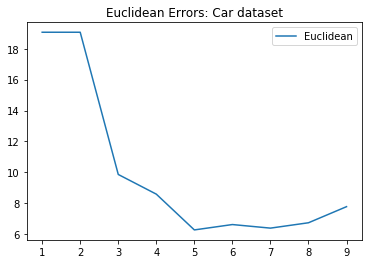

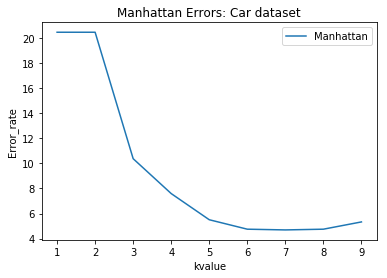

NearestNeighbour  7 ;Error:  4.695652173913032 ;Distance Metric: Manhattan 


In [72]:
X = train1_car.iloc[:,:-1]
y = train1_car.iloc[:,-1]
prediction_points= test1_car.iloc[:,:-1]
prediction_points=np.array(prediction_points)
    
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test1_car.iloc[:,-1])**2)
    accuracy=100-(error/len(test1_car))*100
    return accuracy

#for different K values 
acc_euclidean=[]
acc_manhattan=[]
for k in range(1,10):
    
    results_euclidean,results_manhattan = predict(prediction_points,k)
    
    predictions_euclidean=[]
    
    for result in results_euclidean:
        predictions_euclidean.append(result[1])
    acc_euclidean.append([get_accuracy(predictions_euclidean),k])
    
    predictions_manhattan=[]
    for result in results_manhattan:
        predictions_manhattan.append(result[1])
    acc_manhattan.append([get_accuracy(predictions_manhattan),k])
    
plotx=[]
ploty_test1_euclidean = []
for a in acc_euclidean:
    plotx.append(a[1])
    ploty_test1_euclidean.append(a[0])
    
plotx=[]
ploty_test1_manhattan =[]
for a in acc_manhattan:
    plotx.append(a[1])
    ploty_test1_manhattan.append(a[0])

#print(ploty_test1_euclidean)
#print(ploty_test1_manhattan)
#------------------------------------------------------------------------------------#
#----------------------------------Test2----------------------------------------------#
X = train2_car.iloc[:,:-1]
y = train2_car.iloc[:,-1]
prediction_points= test2_car.iloc[:,:-1]
prediction_points=np.array(prediction_points)
    
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test2_car.iloc[:,-1])**2)
    accuracy=100-(error/len(test2_car))*100
    return accuracy

#for different K values 
acc_euclidean=[]
acc_manhattan=[]
for k in range(1,10):
    
    results_euclidean,results_manhattan = predict(prediction_points,k)
    
    predictions_euclidean=[]
    
    for result in results_euclidean:
        predictions_euclidean.append(result[1])
    acc_euclidean.append([get_accuracy(predictions_euclidean),k])
    
    predictions_manhattan=[]
    for result in results_manhattan:
        predictions_manhattan.append(result[1])
    acc_manhattan.append([get_accuracy(predictions_manhattan),k])
    
plotx=[]
ploty_test2_euclidean = []
for a in acc_euclidean:
    plotx.append(a[1])
    ploty_test2_euclidean.append(a[0])
    
plotx=[]
ploty_test2_manhattan =[]
for a in acc_manhattan:
    plotx.append(a[1])
    ploty_test2_manhattan.append(a[0])

#print(ploty_test2_euclidean)
#print(ploty_test2_manhattan)

#----------------------------------Test3----------------------------------------------#
X = train3_car.iloc[:,:-1]
y = train3_car.iloc[:,-1]
prediction_points= test3_car.iloc[:,:-1]
prediction_points=np.array(prediction_points)
    
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test3_car.iloc[:,-1])**2)
    accuracy=100-(error/len(test3_car))*100
    return accuracy

#for different K values 
acc_euclidean=[]
acc_manhattan=[]
for k in range(1,10):
    
    results_euclidean,results_manhattan = predict(prediction_points,k)
    
    predictions_euclidean=[]
    
    for result in results_euclidean:
        predictions_euclidean.append(result[1])
    acc_euclidean.append([get_accuracy(predictions_euclidean),k])
    
    predictions_manhattan=[]
    for result in results_manhattan:
        predictions_manhattan.append(result[1])
    acc_manhattan.append([get_accuracy(predictions_manhattan),k])
    
plotx=[]
ploty_test3_euclidean = []
for a in acc_euclidean:
    plotx.append(a[1])
    ploty_test3_euclidean.append(a[0])
    
plotx=[]
ploty_test3_manhattan =[]
for a in acc_manhattan:
    plotx.append(a[1])
    ploty_test3_manhattan.append(a[0])

#print(ploty_test3_euclidean)
#print(ploty_test3_manhattan)

#----------------------------------Test4----------------------------------------------#
X = train4_car.iloc[:,:-1]
y = train4_car.iloc[:,-1]
prediction_points= test4_car.iloc[:,:-1]
prediction_points=np.array(prediction_points)
    
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test4_car.iloc[:,-1])**2)
    accuracy=100-(error/len(test4_car))*100
    return accuracy

#for different K values 
acc_euclidean=[]
acc_manhattan=[]
for k in range(1,10):
    
    results_euclidean,results_manhattan = predict(prediction_points,k)
    
    predictions_euclidean=[]
    
    for result in results_euclidean:
        predictions_euclidean.append(result[1])
    acc_euclidean.append([get_accuracy(predictions_euclidean),k])
    
    predictions_manhattan=[]
    for result in results_manhattan:
        predictions_manhattan.append(result[1])
    acc_manhattan.append([get_accuracy(predictions_manhattan),k])
    
plotx=[]
ploty_test4_euclidean = []
for a in acc_euclidean:
    plotx.append(a[1])
    ploty_test4_euclidean.append(a[0])
    
plotx=[]
ploty_test4_manhattan =[]
for a in acc_manhattan:
    plotx.append(a[1])
    ploty_test4_manhattan.append(a[0])

#print(ploty_test4_euclidean)
#print(ploty_test4_manhattan)

#----------------------------------Test5----------------------------------------------#
X = train5_car.iloc[:,:-1]
y = train5_car.iloc[:,-1]
prediction_points= test5_car.iloc[:,:-1]
prediction_points=np.array(prediction_points)
    
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test5_car.iloc[:,-1])**2)
    accuracy=100-(error/len(test5_car))*100
    return accuracy

#for different K values 
acc_euclidean=[]
acc_manhattan=[]
for k in range(1,10):
    
    results_euclidean,results_manhattan = predict(prediction_points,k)
    
    predictions_euclidean=[]
    
    for result in results_euclidean:
        predictions_euclidean.append(result[1])
    acc_euclidean.append([get_accuracy(predictions_euclidean),k])
    
    predictions_manhattan=[]
    for result in results_manhattan:
        predictions_manhattan.append(result[1])
    acc_manhattan.append([get_accuracy(predictions_manhattan),k])
    
plotx=[]
ploty_test5_euclidean = []
for a in acc_euclidean:
    plotx.append(a[1])
    ploty_test5_euclidean.append(a[0])
    
plotx=[]
ploty_test5_manhattan =[]
for a in acc_manhattan:
    plotx.append(a[1])
    ploty_test5_manhattan.append(a[0])

#print(ploty_test5_euclidean)
#print(ploty_test5_manhattan)

#-----------------------------------------Totals for Euclidean----------------------------------------------#
total = [ploty_test1_euclidean[i]+ploty_test2_euclidean[i]+ploty_test3_euclidean[i]+ploty_test4_euclidean[i]+ploty_test5_euclidean[i] for i in range(len(ploty_test1_euclidean))]
total_eucleadian = [100-(total[i]/5) for i in range(len(total))]

#print("Euclidean")
#print(sorted(total_eucleadian))
plt.plot(plotx,total_eucleadian,label="Euclidean")
plt.title('Euclidean Errors: Car dataset')
plt.legend()
plt.show()
#-----------------------------------------Totals for Manhattan----------------------------------------------#
total = [ploty_test1_manhattan[i]+ploty_test2_manhattan[i]+ploty_test3_manhattan[i]+ploty_test4_manhattan[i]+ploty_test5_manhattan[i] for i in range(len(ploty_test1_manhattan))]
total_manhattan = [100-(total[i]/5) for i in range(len(total))]
#print("Manhattan")
#print(sorted(total_manhattan))
plt.plot(plotx,total_manhattan,label="Manhattan" )
plt.xlabel('kvalue')
plt.ylabel('Error_rate')
plt.title('Manhattan Errors: Car dataset')
plt.legend()
plt.show()
x = min(min(total_eucleadian),min(total_manhattan))
error_knn_car = x
nearest_neigh_car = 0
temp = 0
if x == min(total_eucleadian):
    temp = 1
    for i in range(len(total_eucleadian)):
        if total_eucleadian[i] == x:
            nearest_neigh_car = i+1
            print("NearestNeighbour ",i+1,";Error: ", x, ";Distance Metric: Euclidean ")
            break
elif x == min(total_manhattan):
    temp =2
    for i in range(len(total_manhattan)):
        if total_manhattan[i] == x:
            nearest_neigh_car = i+1
            print("NearestNeighbour ",i+1,";Error: ", x, ";Distance Metric: Manhattan ")
            break
if temp == 1:
    best_distcar = "Euclidiean"
else:
    best_distcar = "Manhattan"

## Credit Card Approval Dataset

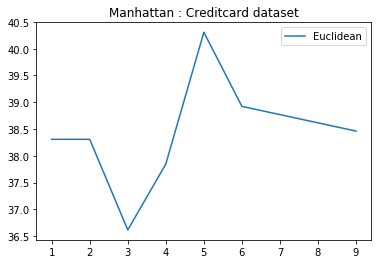

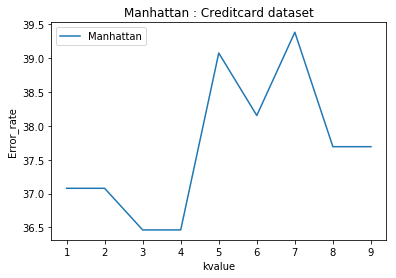

Yes
NearestNeighbour  3 ;Error:  36.46153846153845 ;Distance Metric: Manhattan 


In [74]:
X = train1_credit.iloc[:,:-1]
y = train1_credit.iloc[:,-1]
prediction_points= test1_credit.iloc[:,:-1]
prediction_points=np.array(prediction_points)
    
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test1_credit.iloc[:,-1])**2)
    accuracy=100-(error/len(test1_credit))*100
    return accuracy

#for different K values 
acc_euclidean=[]
acc_manhattan=[]
for k in range(1,10):
    
    results_euclidean,results_manhattan = predict(prediction_points,k)
    
    predictions_euclidean=[]
    
    for result in results_euclidean:
        predictions_euclidean.append(result[1])
    acc_euclidean.append([get_accuracy(predictions_euclidean),k])
    
    predictions_manhattan=[]
    for result in results_manhattan:
        predictions_manhattan.append(result[1])
    acc_manhattan.append([get_accuracy(predictions_manhattan),k])
    
plotx=[]
ploty_test1_euclidean = []
for a in acc_euclidean:
    plotx.append(a[1])
    ploty_test1_euclidean.append(a[0])
    
plotx=[]
ploty_test1_manhattan =[]
for a in acc_manhattan:
    plotx.append(a[1])
    ploty_test1_manhattan.append(a[0])

#print(ploty_test1_euclidean)
#print(ploty_test1_manhattan)
#------------------------------------------------------------------------------#
X = train2_credit.iloc[:,:-1]
y = train2_credit.iloc[:,-1]
prediction_points= test2_credit.iloc[:,:-1]
prediction_points=np.array(prediction_points)
    
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test2_credit.iloc[:,-1])**2)
    accuracy=100-(error/len(test2_credit))*100
    return accuracy

#for different K values 
acc_euclidean=[]
acc_manhattan=[]
for k in range(1,10):
    
    results_euclidean,results_manhattan = predict(prediction_points,k)
    
    predictions_euclidean=[]
    
    for result in results_euclidean:
        predictions_euclidean.append(result[1])
    acc_euclidean.append([get_accuracy(predictions_euclidean),k])
    
    predictions_manhattan=[]
    for result in results_manhattan:
        predictions_manhattan.append(result[1])
    acc_manhattan.append([get_accuracy(predictions_manhattan),k])
    
plotx=[]
ploty_test2_euclidean = []
for a in acc_euclidean:
    plotx.append(a[1])
    ploty_test2_euclidean.append(a[0])
    
plotx=[]
ploty_test2_manhattan =[]
for a in acc_manhattan:
    plotx.append(a[1])
    ploty_test2_manhattan.append(a[0])

#print(ploty_test2_euclidean)
#print(ploty_test2_manhattan)
#------------------------------------------------------------------------------#
#------------------------------------------------------------------------------#
X = train3_credit.iloc[:,:-1]
y = train3_credit.iloc[:,-1]
prediction_points= test3_credit.iloc[:,:-1]
prediction_points=np.array(prediction_points)
    
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test3_credit.iloc[:,-1])**2)
    accuracy=100-(error/len(test3_credit))*100
    return accuracy

#for different K values 
acc_euclidean=[]
acc_manhattan=[]
for k in range(1,10):
    
    results_euclidean,results_manhattan = predict(prediction_points,k)
    
    predictions_euclidean=[]
    
    for result in results_euclidean:
        predictions_euclidean.append(result[1])
    acc_euclidean.append([get_accuracy(predictions_euclidean),k])
    
    predictions_manhattan=[]
    for result in results_manhattan:
        predictions_manhattan.append(result[1])
    acc_manhattan.append([get_accuracy(predictions_manhattan),k])
    
plotx=[]
ploty_test3_euclidean = []
for a in acc_euclidean:
    plotx.append(a[1])
    ploty_test3_euclidean.append(a[0])
    
plotx=[]
ploty_test3_manhattan =[]
for a in acc_manhattan:
    plotx.append(a[1])
    ploty_test3_manhattan.append(a[0])

#print(ploty_test3_euclidean)
#print(ploty_test3_manhattan)
#------------------------------------------------------------------------------#
#------------------------------------------------------------------------------#
X = train4_credit.iloc[:,:-1]
y = train4_credit.iloc[:,-1]
prediction_points= test4_credit.iloc[:,:-1]
prediction_points=np.array(prediction_points)
    
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test4_credit.iloc[:,-1])**2)
    accuracy=100-(error/len(test4_credit))*100
    return accuracy

#for different K values 
acc_euclidean=[]
acc_manhattan=[]
for k in range(1,10):
    
    results_euclidean,results_manhattan = predict(prediction_points,k)
    
    predictions_euclidean=[]
    
    for result in results_euclidean:
        predictions_euclidean.append(result[1])
    acc_euclidean.append([get_accuracy(predictions_euclidean),k])
    
    predictions_manhattan=[]
    for result in results_manhattan:
        predictions_manhattan.append(result[1])
    acc_manhattan.append([get_accuracy(predictions_manhattan),k])
    
plotx=[]
ploty_test4_euclidean = []
for a in acc_euclidean:
    plotx.append(a[1])
    ploty_test4_euclidean.append(a[0])
    
plotx=[]
ploty_test4_manhattan =[]
for a in acc_manhattan:
    plotx.append(a[1])
    ploty_test4_manhattan.append(a[0])

#print(ploty_test4_euclidean)
#print(ploty_test4_manhattan)
#------------------------------------------------------------------------------#
#------------------------------------------------------------------------------#
X = train5_credit.iloc[:,:-1]
y = train5_credit.iloc[:,-1]
prediction_points= test5_credit.iloc[:,:-1]
prediction_points=np.array(prediction_points)
    
def get_eculidean_distance(point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]

def get_manhattan_distance(point,k):
    manhattan_distance = np.sum(abs(X - point) , axis=1)
    return np.argsort(manhattan_distance)[0:k]


def predict(prediction_points,k):
    
    points_labels_euclidean = []
    points_labels_manhattan = []
    
    for point in prediction_points:
        
        distances_euclidean = get_eculidean_distance(point,k)
        distances_manhattan = get_manhattan_distance(point,k)
        
        results_euclidean=[]
        results_manhattan=[]
        
        for index in distances_euclidean:
            #print(y[index])
            results_euclidean.append(y[index])
            
        
        for index in distances_manhattan:
            #print(y[index])
            results_manhattan.append(y[index])
        
        label_euclidean = Counter(results_euclidean).most_common(1)
        label_manhattan = Counter(results_manhattan).most_common(1)
        
        points_labels_euclidean.append([point,label_euclidean[0][0]])
        points_labels_manhattan.append([point,label_manhattan[0][0]])
        
    return points_labels_euclidean,points_labels_manhattan


def get_accuracy(predictions):
    error=np.sum((predictions-test5_credit.iloc[:,-1])**2)
    accuracy=100-(error/len(test5_credit))*100
    return accuracy

#for different K values 
acc_euclidean=[]
acc_manhattan=[]
for k in range(1,10):
    
    results_euclidean,results_manhattan = predict(prediction_points,k)
    
    predictions_euclidean=[]
    
    for result in results_euclidean:
        predictions_euclidean.append(result[1])
    acc_euclidean.append([get_accuracy(predictions_euclidean),k])
    
    predictions_manhattan=[]
    for result in results_manhattan:
        predictions_manhattan.append(result[1])
    acc_manhattan.append([get_accuracy(predictions_manhattan),k])
    
plotx=[]
ploty_test5_euclidean = []
for a in acc_euclidean:
    plotx.append(a[1])
    ploty_test5_euclidean.append(a[0])
    
plotx=[]
ploty_test5_manhattan =[]
for a in acc_manhattan:
    plotx.append(a[1])
    ploty_test5_manhattan.append(a[0])

#print(ploty_test5_euclidean)
#print(ploty_test5_manhattan)
#------------------------------------------------------------------------------#

#-----------------------------------------Totals for Euclidean----------------------------------------------#
total = [ploty_test1_euclidean[i]+ploty_test2_euclidean[i]+ploty_test3_euclidean[i]+ploty_test4_euclidean[i]+ploty_test5_euclidean[i] for i in range(len(ploty_test1_euclidean))]
total_eucleadian = [100-(total[i]/5) for i in range(len(total))]

#print("Euclidean")
#print(sorted(total_eucleadian))
plt.plot(plotx,total_eucleadian,label="Euclidean")
plt.title('Manhattan : Creditcard dataset')
plt.legend()
plt.show()
#-----------------------------------------Totals for Manhattan----------------------------------------------#
total = [ploty_test1_manhattan[i]+ploty_test2_manhattan[i]+ploty_test3_manhattan[i]+ploty_test4_manhattan[i]+ploty_test5_manhattan[i] for i in range(len(ploty_test1_manhattan))]
total_manhattan = [100-(total[i]/5) for i in range(len(total))]
#print("Manhattan")
#print(sorted(total_manhattan))
plt.plot(plotx,total_manhattan,label="Manhattan" )
plt.xlabel('kvalue')
plt.ylabel('Error_rate')
plt.title('Manhattan : Creditcard dataset')
plt.legend()
plt.show()
error_knn_credit = min(min(total_eucleadian),min(total_manhattan))
x=min(min(total_eucleadian),min(total_manhattan))
temp = 0
if x == min(total_eucleadian):
    print("Yes")
    temp = 1
    for i in range(len(total_eucleadian)):
        if total_eucleadian[i] == x:
            nearest_neigh_credit = i+1
            print("NearestNeighbour ",i+1,";Error: ", x, ";Distance Metric: Euclidean ")
            break
elif x == min(total_manhattan):
    print("Yes")
    temp = 2
    for i in range(len(total_manhattan)):
        if total_manhattan[i] == x:
            nearest_neigh_credit = i+1
            print("NearestNeighbour ",i+1,";Error: ", x, ";Distance Metric: Manhattan ")
            break
if temp == 1:
    best_distance_credit = "Euclidean"
else:
    best_distance_credit = "Manhattan"

In [33]:
error_knn_credit

36.46153846153845

## 2.3 Use sklearn's KNN implementation for validation.

## SCIKIT Learn KNN implementation

In [115]:
#---------Grid Search for Ionosphere Dataset----------------#
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'metric':["euclidean", "manhattan"]}
model = GridSearchCV(knn, param_grid=parameters)
model.fit(df_ionosphere.iloc[:,:-1],df_ionosphere.iloc[:,-1])
print(model.best_params_)
(1 - model.best_score_)*100


{'metric': 'manhattan', 'n_neighbors': 1}


9.401709401709402

In [122]:

comparsion_ionosphere = {"Num_of_Neighbours":[nearest_neigh_ionosphere,model.best_params_['n_neighbors']],"Best_Distance":[best_distance,model.best_params_["metric"]]
                         ,"Error":[error_knn_ionosphere,(1 - model.best_score_)*100]}
df = pd.DataFrame(comparsion_ionosphere)
df.rename(index={0:"KNN Implementation",1: 'Scikit Learn KNN implementation'})

,Num_of_Neighbours,Best_Distance,Error
KNN Implementation,1,Manhattan,9.714286
Scikit Learn KNN implementation,1,manhattan,9.401709


In [62]:
#---------Grid Search for CarWash Dataset----------------#
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'metric':["euclidean", "manhattan"]}
model = GridSearchCV(knn, param_grid=parameters)
model.fit(df_car_evaluation.iloc[:,:-1],df_car_evaluation.iloc[:,-1])
print(model.best_params_)
(1 - model.best_score_)*100

{'metric': 'manhattan', 'n_neighbors': 7}


4.745370370370372

In [63]:
comparsion_CarEval = {"Num_of_Neighbours":[nearest_neigh_car,model.best_params_['n_neighbors']],"Best_Distance":[best_distcar,model.best_params_["metric"]]
                         ,"Error":[error_knn_car,(1 - model.best_score_)*100]}
df = pd.DataFrame(comparsion_CarEval)
df.rename(index={0:"KNN Implementation",1: 'Scikit Learn KNN implementation'})

,Num_of_Neighbours,Best_Distance,Error
KNN Implementation,7,Manhattan,4.695652
Scikit Learn KNN implementation,7,manhattan,4.745370


In [60]:
#---------Grid Search for Credit Card Approval Dataset----------------#
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'metric':["euclidean", "manhattan"]}
model_credit = GridSearchCV(knn, param_grid=parameters)
model_credit.fit(df_credit_approval.iloc[:,:-1],df_credit_approval.iloc[:,-1])
print(model_credit.best_params_)
print("Error")
(1 - model_credit.best_score_)*100

{'metric': 'manhattan', 'n_neighbors': 4}
Error


30.627871362940272

In [61]:
comparsion_creditcard = {"Num_of_Neighbours":[nearest_neigh_credit,model_credit.best_params_['n_neighbors']],"Best_Distance":[best_distance_credit,model_credit.best_params_["metric"]]
                         ,"Error":[error_knn_credit,(1 - model_credit.best_score_)*100]}
df = pd.DataFrame(comparsion_creditcard)
df.rename(index={0:"KNN Implementation",1: 'Scikit Learn KNN implementation'})


,Num_of_Neighbours,Best_Distance,Error
KNN Implementation,3,Manhattan,36.461538
Scikit Learn KNN implementation,4,manhattan,30.627871


## Problem 3: Naive Bayes Classifier [30 points]

3.1 Implement Naive Bayes classifier. You may need to modify it for categorical variables. To handle unseen feature values, you may need to make use Laplace smoothing or the m-estimate of conditional probability method.

#### https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/ 

used the above link for reference

In [22]:
# Code for problem 3.1 goes here

def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

import math

def calculateProbability(x, mean, stdev): ### Division By Zero Error so add small value
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev+0.1)
    return probabilities

def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

3.2 Train Naive Bayes classifiers over training data sets and test each classifier against corresponding test data. Make a plot that shows the error over each test data. Report the average error rate for 5-fold cross validation for each data sets.

## Ionosphere


[10.0, 5.714285714285722, 8.57142857142857, 17.14285714285714, 14.285714285714292]
The average error after 5fold CV is:  11.142857142857139


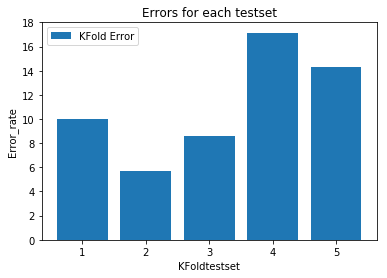

In [23]:
# Code for problem 3.2 goes here
main_accuracy = []
dataset = train1_ionosphere.values # Change training set
test = test1_ionoshere # change test set

summaries = summarizeByClass(dataset)
output = []

for i in range(test.shape[0]):
    
    inputVector = test.iloc[i,:-1]
    result = predict(summaries, inputVector)
    output.append(result)

accuracy =  getAccuracy(test.iloc[:,-1],output)
main_accuracy.append(accuracy)
#------------------------------------------#
dataset = train2_ionoshpere.values # Change training set
test = test2_ionoshere # change test set

summaries = summarizeByClass(dataset)
output = []

for i in range(test.shape[0]):
    
    inputVector = test.iloc[i,:-1]
    result = predict(summaries, inputVector)
    output.append(result)

accuracy =  getAccuracy(test.iloc[:,-1],output)
main_accuracy.append(accuracy)
#---------------------------------------------#
dataset = train3_ionosphere.values # Change training set
test = test3_ionoshere # change test set

summaries = summarizeByClass(dataset)
output = []

for i in range(test.shape[0]):
    
    inputVector = test.iloc[i,:-1]
    result = predict(summaries, inputVector)
    output.append(result)

accuracy =  getAccuracy(test.iloc[:,-1],output)
main_accuracy.append(accuracy)

#-----------------------------------------------#
dataset = train4_ionoshpere.values # Change training set
test = test4_ionoshere # change test set

summaries = summarizeByClass(dataset)
output = []

for i in range(test.shape[0]):
    
    inputVector = test.iloc[i,:-1]
    result = predict(summaries, inputVector)
    output.append(result)

accuracy =  getAccuracy(test.iloc[:,-1],output)
main_accuracy.append(accuracy)
#--------------------------------------------------#
dataset = train5_ionoshpere.values # Change training set
test = test5_ionoshere # change test set

summaries = summarizeByClass(dataset)
output = []

for i in range(test.shape[0]):
    
    inputVector = test.iloc[i,:-1]
    result = predict(summaries, inputVector)
    output.append(result)

accuracy =  getAccuracy(test.iloc[:,-1],output)
main_accuracy.append(accuracy)
Error = [100-i for i in main_accuracy]
print(Error)
plotx = [i for i in range(1,6)]
plt.bar(plotx,Error,label="KFold Error" )
plt.xlabel('KFoldtestset')
plt.ylabel('Error_rate')
plt.title('Errors for each testset')
plt.legend()
#---------------------------------------------------#
error_naivebayes_ionosphere = 100 - sum(main_accuracy)/len(main_accuracy)
print("The average error after 5fold CV is: ",error_naivebayes_ionosphere)

## Car Evaluation- Naive Bayes

The average error after 5fold CV is:  26.434782608695656


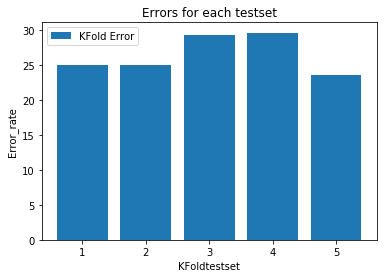

In [24]:
main_accuracy = []

dataset = train1_car.values # Change training set
test = test1_car # change test set

summaries = summarizeByClass(dataset)
output = []

for i in range(test.shape[0]):
    
    inputVector = test.iloc[i,:-1]
    result = predict(summaries, inputVector)
    output.append(result)

accuracy =  getAccuracy(test.iloc[:,-1],output)
main_accuracy.append(accuracy)
#-----------------------------------------------------#
dataset = train2_car.values # Change training set
test = test2_car # change test set

summaries = summarizeByClass(dataset)
output = []

for i in range(test.shape[0]):
    
    inputVector = test.iloc[i,:-1]
    result = predict(summaries, inputVector)
    output.append(result)

accuracy =  getAccuracy(test.iloc[:,-1],output)
main_accuracy.append(accuracy)
#------------------------------------------------------#
dataset = train3_car.values # Change training set
test = test3_car # change test set

summaries = summarizeByClass(dataset)
output = []

for i in range(test.shape[0]):
    
    inputVector = test.iloc[i,:-1]
    result = predict(summaries, inputVector)
    output.append(result)

accuracy =  getAccuracy(test.iloc[:,-1],output)
main_accuracy.append(accuracy)
#-------------------------------------------------------#
dataset = train4_car.values # Change training set
test = test4_car # change test set

summaries = summarizeByClass(dataset)
output = []

for i in range(test.shape[0]):
    
    inputVector = test.iloc[i,:-1]
    result = predict(summaries, inputVector)
    output.append(result)

accuracy =  getAccuracy(test.iloc[:,-1],output)
main_accuracy.append(accuracy)

#----------------------------------------------------#
dataset = train5_car.values # Change training set
test = test5_car # change test set

summaries = summarizeByClass(dataset)
output = []

for i in range(test.shape[0]):
    
    inputVector = test.iloc[i,:-1]
    result = predict(summaries, inputVector)
    output.append(result)

accuracy =  getAccuracy(test.iloc[:,-1],output)
main_accuracy.append(accuracy)

Error = [100-i for i in main_accuracy]
#print(Error)
plotx = [i for i in range(1,6)]
plt.bar(plotx,Error,label="KFold Error" )
plt.xlabel('KFoldtestset')
plt.ylabel('Error_rate')
plt.title('Errors for each testset')
plt.legend()
#---------------------------------------------------#
error_naivebayes_careval = 100 - sum(main_accuracy)/len(main_accuracy)
print("The average error after 5fold CV is: ",error_naivebayes_careval)


## Credit Card Approval Dataset - Naive Bayes 

The average error after 5fold CV is:  24.15384615384616


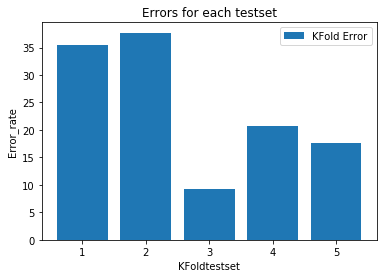

In [25]:
main_accuracy = []

dataset = train1_credit.values # Change training set
test = test1_credit # change test set

summaries = summarizeByClass(dataset)
output = []

for i in range(test.shape[0]):
    
    inputVector = test.iloc[i,:-1]
    result = predict(summaries, inputVector)
    output.append(result)

accuracy =  getAccuracy(test.iloc[:,-1],output)
main_accuracy.append(accuracy)
#----------------------------------------------------------#

dataset = train2_credit.values # Change training set
test = test2_credit # change test set

summaries = summarizeByClass(dataset)
output = []

for i in range(test.shape[0]):
    
    inputVector = test.iloc[i,:-1]
    result = predict(summaries, inputVector)
    output.append(result)

accuracy =  getAccuracy(test.iloc[:,-1],output)
main_accuracy.append(accuracy)
#----------------------------------------------------------#

dataset = train3_credit.values # Change training set
test = test3_credit # change test set

summaries = summarizeByClass(dataset)
output = []

for i in range(test.shape[0]):
    
    inputVector = test.iloc[i,:-1]
    result = predict(summaries, inputVector)
    output.append(result)

accuracy =  getAccuracy(test.iloc[:,-1],output)
main_accuracy.append(accuracy)

#----------------------------------------------------------#

dataset = train4_credit.values # Change training set
test = test4_credit # change test set

summaries = summarizeByClass(dataset)
output = []


for i in range(test.shape[0]):
    
    inputVector = test.iloc[i,:-1]
    result = predict(summaries, inputVector)
    output.append(result)

accuracy =  getAccuracy(test.iloc[:,-1],output)
main_accuracy.append(accuracy)

#----------------------------------------------------------#

dataset = train5_credit.values # Change training set
test = test5_credit # change test set

summaries = summarizeByClass(dataset)
output = []

for i in range(test.shape[0]):
    
    inputVector = test.iloc[i,:-1]
    result = predict(summaries, inputVector)
    output.append(result)

accuracy =  getAccuracy(test.iloc[:,-1],output)
main_accuracy.append(accuracy)
Error = [100-i for i in main_accuracy]
#print(Error)
plotx = [i for i in range(1,6)]
plt.bar(plotx,Error,label="KFold Error" )
plt.xlabel('KFoldtestset')
plt.ylabel('Error_rate')
plt.title('Errors for each testset')
plt.legend()
#---------------------------------------------------#
error_naivebayes_creditcard = 100 - sum(main_accuracy)/len(main_accuracy)
print("The average error after 5fold CV is: ",error_naivebayes_creditcard)




3.3 Use Naive Bayes package in sklearn for validation.

### IONOSPHERE - Naive Bayes Scikit Learn 

In [44]:
# Code for problem 3.3 goes here
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(df_ionosphere.iloc[:,:-1],df_ionosphere.iloc[:,-1] ).predict(df_ionosphere.iloc[:,:-1])
accuracy = getAccuracy(df_ionosphere.iloc[:,-1],y_pred)
Error = 100 - accuracy
print("Best Error is ",Error)

Best Error is  10.541310541310551


### Car Evaluation- Bayes Scikit learn

In [45]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(df_car_evaluation.iloc[:,:-1],df_car_evaluation.iloc[:,-1] ).predict(df_car_evaluation.iloc[:,:-1])
accuracy = getAccuracy(df_car_evaluation.iloc[:,-1],y_pred)
Error = 100 - accuracy
print("Best Error is ",Error)

Best Error is  23.148148148148152


### Credit Card - Bayes Scikit Learn

In [46]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(df_credit_approval.iloc[:,:-1],df_credit_approval.iloc[:,-1] ).predict(df_credit_approval.iloc[:,:-1])
accuracy = getAccuracy(df_credit_approval.iloc[:,-1].values,y_pred)
Error = 100 - accuracy
print("Best Error is ",Error)

Best Error is  21.28637059724349


## Problem 4: Naive Bayes Classifier vs. K-Nearest Neighbors [10 points]

In this question, you are asked to compare Naive Bayes classifier with K-NN algorithm. First, determine the best K-NN model for each data set. Then, make a plot that reveals comparison of two algorithms using test error for each data set. (Total number of figures = 3)

Text(0.5,1,'Errors for car evaluation')

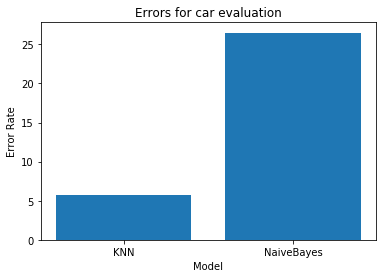

In [96]:
plotx = ["KNN","NaiveBayes"]
ploty = [error_knn_car,error_naivebayes_careval]
plt.bar(plotx,ploty)
plt.xlabel('Model')
plt.ylabel('Error Rate')
plt.title('Errors for car evaluation')


12.57142857142857


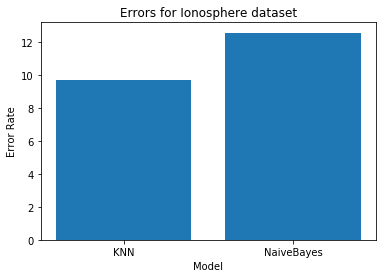

In [98]:
plotx = ["KNN","NaiveBayes"]
ploty = [error_knn_ionosphere,error_naivebayes_ionosphere]
plt.bar(plotx,ploty)
plt.xlabel('Model')
plt.ylabel('Error Rate')
plt.title('Errors for Ionosphere dataset')
print(error_naivebayes_ionosphere)

Text(0.5,1,'Errors for Credit Card Approval')

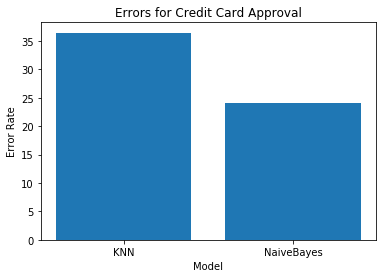

In [99]:
plotx = ["KNN","NaiveBayes"]
ploty = [error_knn_credit,error_naivebayes_creditcard]
plt.bar(plotx,ploty)
plt.xlabel('Model')
plt.ylabel('Error Rate')
plt.title('Errors for Credit Card Approval')

## Problem 5: Support Vector Machines [20 points]

In this problem we are going to use the Iris dataset. This dataset has four features:

1.   sepal length
2.   sepal width
3.   petal length
4.   petal width

and three classes:

1.    Iris-Setosa
2.    Iris-Versicolour
3.    Iris-Virginica

In [6]:
from sklearn import svm, datasets

In [7]:
iris = datasets.load_iris()

df_iris = iris.data

X = iris.data[:, :2]
y = iris.target

5.1 Create two plots:

1.   One using the sepal length (x-axis) and sepal width (y-axis),
2.   One using the petal length (x-axis) and petal width (y-axis),



Text(0.5,1,'Sepal Length vs Sepal Width')

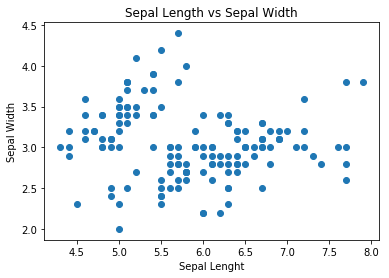

In [8]:
# Code for problem 5.1 goes here
plotx = df_iris[:,0]
ploty = df_iris[:,1]
plt.scatter(plotx,ploty)
plt.xlabel('Sepal Lenght')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')


Text(0.5,1,'Petal Length vs Petal Width')

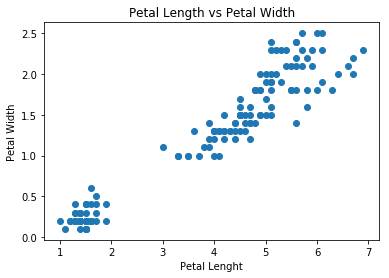

In [9]:
plotx = df_iris[:,2]
ploty = df_iris[:,3]
plt.scatter(plotx,ploty)
plt.xlabel('Petal Lenght')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')


5.2 Create a SVM with the following kernels and train it using the sepal features:


1.   SVC with linear kernel (use sklearn's svm.SVC with the kernel parameter 'linear'),
2.   LinearSVC (use sklearn's svm.LinearSVC),
3.   SVC with the RBF kernel,
4.   SVC with a polynomial kernel of degree 3

Plot the decision boundary for each of the four models. Hint: use matplotlib’s contourf and scatter functions. Be sure to label your axes.
used the link  https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html for reference

In [5]:
from sklearn import svm, datasets

    

In [20]:
def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



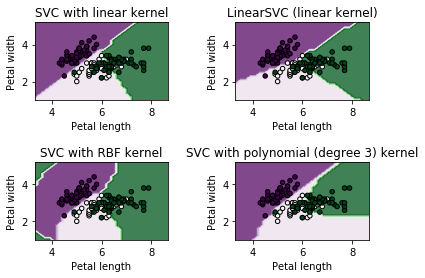

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
iris = datasets.load_iris()
X = iris.data[:, 0:2]
y = iris.target

C = 1.0  

# title for the plots
model_dict  = {'SVC with linear kernel' : svm.SVC(kernel='linear', C=C),
          'LinearSVC (linear kernel)' : svm.LinearSVC(C=C),
          'SVC with RBF kernel' : svm.SVC(kernel='rbf', gamma=0.7, C=C),
          'SVC with polynomial (degree 3) kernel' : svm.SVC(kernel='poly', degree=3, C=C)}

models2 = [model_dict[m].fit(X, y) for m in model_dict.keys()]


fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.5, hspace=0.8)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = np.meshgrid(np.arange(X0.min() - 1, X0.max() + 1, 0.2),
                         np.arange(X1.min() - 1, X1.max() + 1, 0.2))

for clf, title, ax in zip(models2, model_dict.keys(), sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.PRGn, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.PRGn, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_title(title)

plt.show()


5.3 Repeat 5.2 using the petal features.

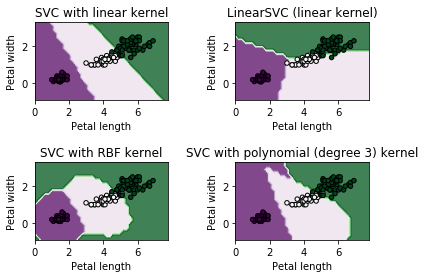

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets



iris = datasets.load_iris()

X = iris.data[:, 2:4]
y = iris.target

C = 1.0  


model_dict  = {'SVC with linear kernel' : svm.SVC(kernel='linear', C=C),
          'LinearSVC (linear kernel)' : svm.LinearSVC(C=C),
          'SVC with RBF kernel' : svm.SVC(kernel='rbf', gamma=0.7, C=C),
          'SVC with polynomial (degree 3) kernel' : svm.SVC(kernel='poly', degree=3, C=C)}

models2 = [model_dict[m].fit(X, y) for m in model_dict.keys()]

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.5, hspace=0.8)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = np.meshgrid(np.arange(X0.min() - 1, X0.max() + 1, 0.2),
                         np.arange(X1.min() - 1, X1.max() + 1, 0.2))

for clf, title, ax in zip(models2, model_dict.keys(), sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.PRGn, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.PRGn, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_title(title)

plt.show()
